<a href="https://colab.research.google.com/github/crislanecas/python/blob/main/Alura%26WoMakersCode/12_Projeto_Correla%C3%A7%C3%A3o_e_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [ ]:
# !pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [6]:
# Importa as bibliotecas.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import statsmodels.api as sm

### Importe o dataset

In [7]:
# Importa parte da biblioteca do Google Colab para te acesso ao Google Drive, utilizando o método drive.mount().
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Cria um dataframe para receber os dados do arquivo CSV.
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Analytics - WoMakersCode/Estatística - Alura/00. Dados/dados_projeto.csv', sep=';')

### Visualize o conteúdo do DataFrame

In [14]:
# Mostra um resumo do dataframe, com os 5 primeiros e últimos registros e total de linhas e colunas.# Mostra um resumo do dataframe, com os 5 primeiros e últimos registros e total de linhas e colunas.
dados

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82
...,...,...
360,32307,24.00
361,26095,22.64
362,22309,21.68
363,20467,21.38


### Obtenha e avalie as estatísticas descritivas dos dados

In [16]:
# Mostra uma tabela descritiva com os dados estatísticos.
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

<Axes: title={'center': 'Box plot'}, xlabel='Consumo de cerveja (litros)'>

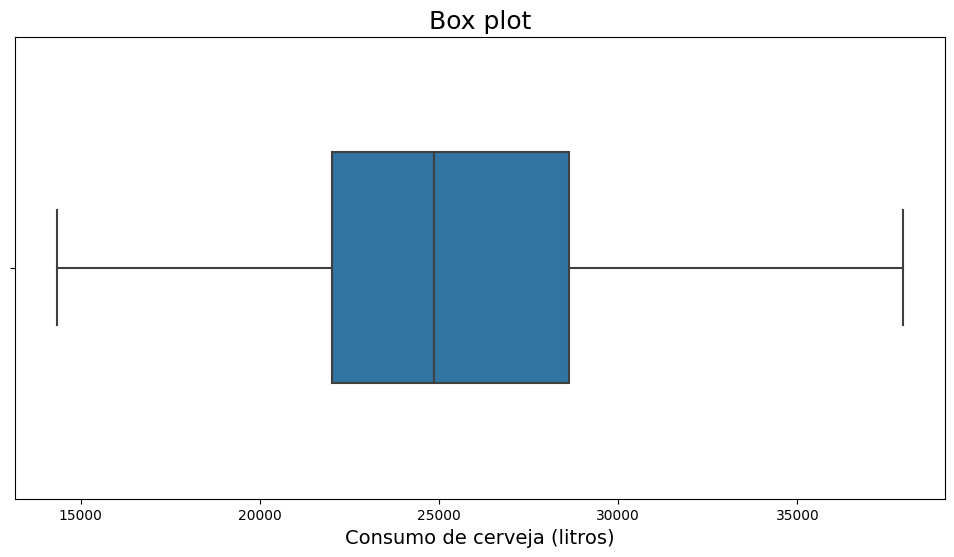

In [19]:
# Cria um boxplot com a variável Y.
ax = sns.boxplot(x='Y', data=dados, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=18)
ax.set_xlabel('Consumo de cerveja (litros)', fontsize=14)
ax

<Axes: title={'center': 'Box plot'}, xlabel='Temperatura média'>

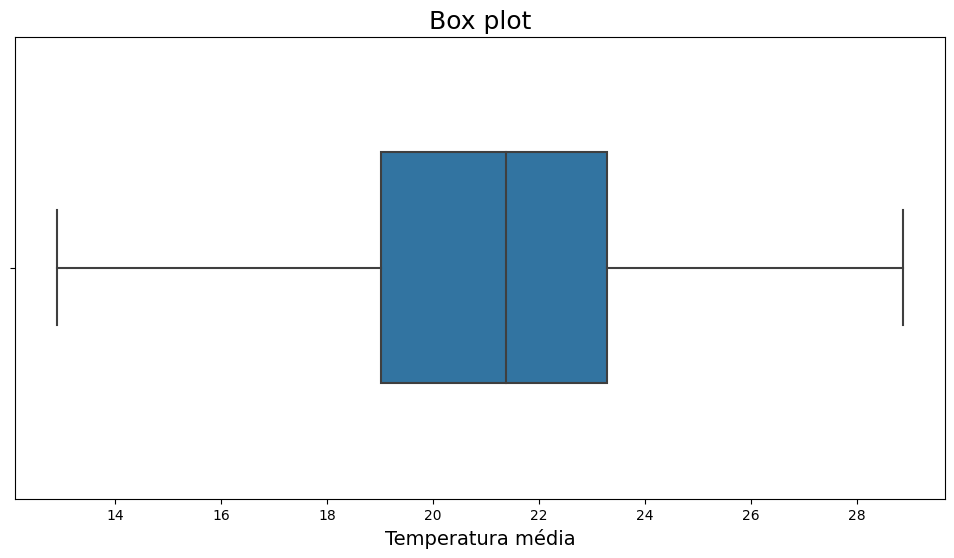

In [21]:
# Cria um boxplot com a variável X.
ax = sns.boxplot(x='X', data=dados, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=18)
ax.set_xlabel('Temperatura média', fontsize=14)
ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

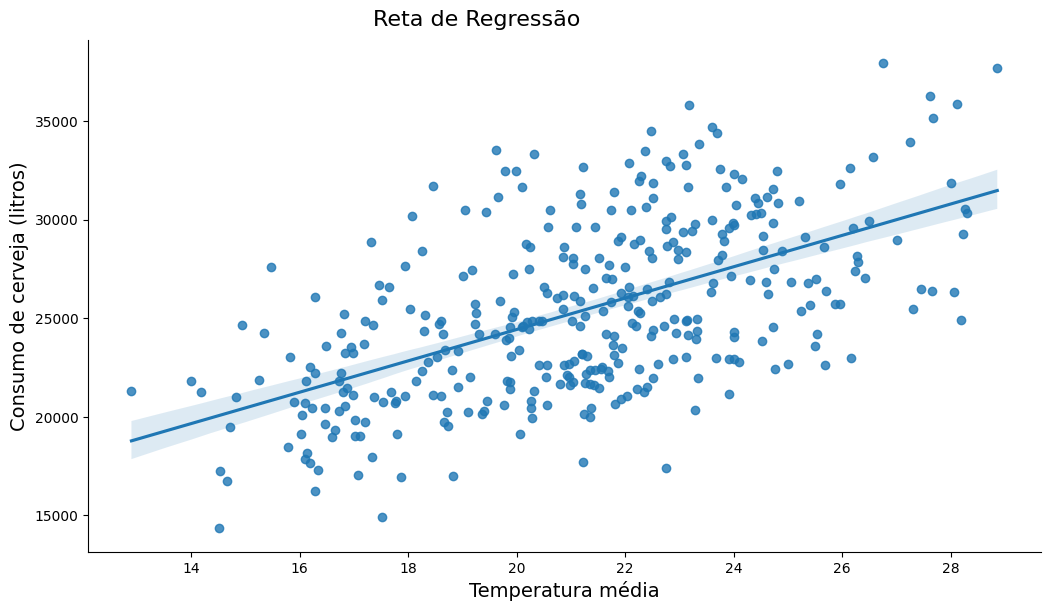

In [26]:
# Cria um gráfico de dispersão, com uma linha de tendência.
ax = sns.lmplot(x="X", y="Y", data=dados)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura média", fontsize=14)
ax.set_ylabels("Consumo de cerveja (litros)", fontsize=14)
ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [24]:
# Cria uma matriz com o calculos da correlação entre as variáveis X e Y.
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim.

É possível quantificar a intensidade dessa relação?

Resp.: Sim, a partir do coeficiente de correlação.

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não.

### Prepare os dados para estimar um modelo de regressão linear simples

In [27]:
# Cria duas variáveis, que depois irá deixar de existir.
Y = dados.Y
X = sm.add_constant(dados.X)

### Estime o modelo de regressão linear simples

In [28]:
# Cria um modelo de regressão usando o método .OLS e a função fit().
resultado_regressao = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [29]:
# Mostra um resumo do modelo de regressão.
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.87e-33
Time:                        22:11:13   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [35]:
# Cria uma previsão de acordo com a amostra, utilizando o método predict().
dados['Y_previsto'] = resultado_regressao.predict()
dados.head()

,Y,X,Y_previsto_statsmodels,Residuos,Y_previsto
0,25461,27.30,30229.200544,-4768.200544,30229.200544
1,28972,27.02,30006.633434,-1034.633434,30006.633434
2,30814,24.82,28257.891852,2556.108148,28257.891852
3,29799,23.98,27590.190521,2208.809479,27590.190521
4,28900,23.82,27463.009315,1436.990685,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [36]:
# Cria uma previsão, considerando valores fora da amostra.
# Passando como parâmetro a const e temperatura de 42 graus.
resultado_regressao.predict([1, 42])[0]

41913.97383816628

### Obtenha os resíduos da regressão

In [37]:
# Calcula o residuos, utilizando método resid, da biblioteca statsmodels.
dados['Residuos'] = resultado_regressao.resid
dados.head()

,Y,X,Y_previsto_statsmodels,Residuos,Y_previsto
0,25461,27.30,30229.200544,-4768.200544,30229.200544
1,28972,27.02,30006.633434,-1034.633434,30006.633434
2,30814,24.82,28257.891852,2556.108148,28257.891852
3,29799,23.98,27590.190521,2208.809479,27590.190521
4,28900,23.82,27463.009315,1436.990685,27463.009315


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

<Axes: title={'center': 'Resíduos vs Y_previsto'}, xlabel='Y_previsto', ylabel='Resíduos'>

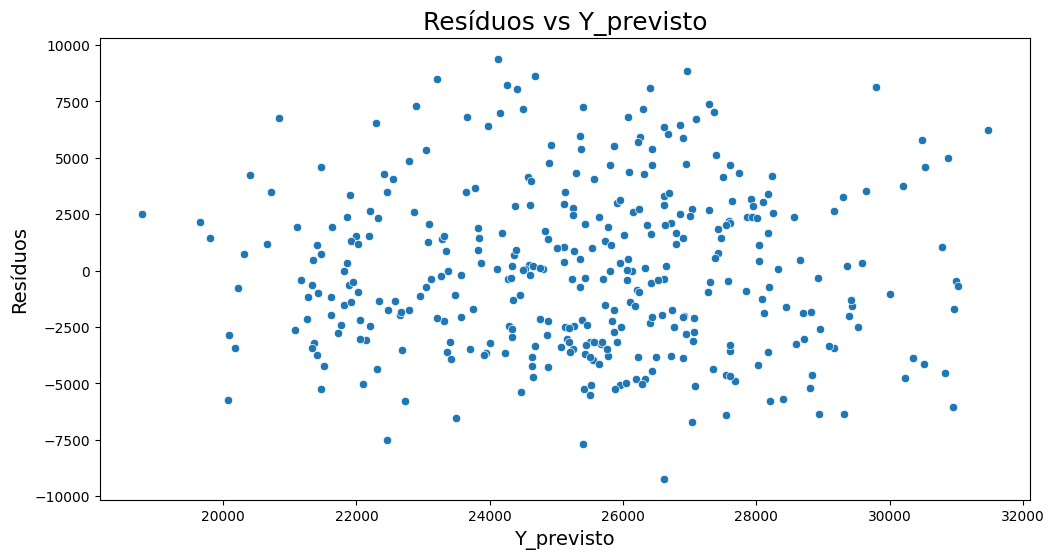

In [39]:
# Cria um gráfico de dispersão simples, com duas variáveis.
ax = sns.scatterplot(x=dados.Y_previsto, y=dados.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_previsto', fontsize=18)
ax.set_xlabel('Y_previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

### Obtenha o QQPlot dos resíduos

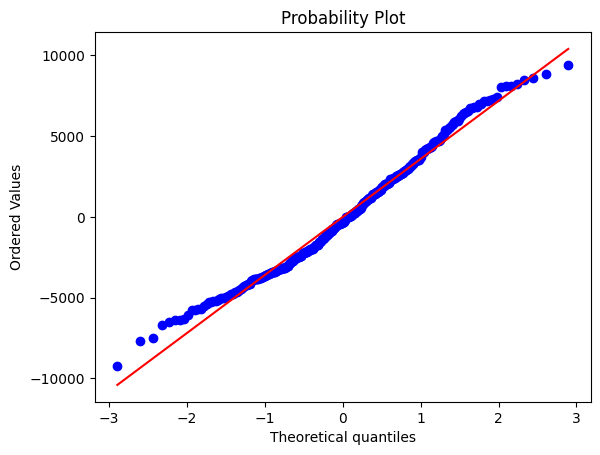

In [41]:
# Cria um gráfico que faz uma comparação de distribuições de probabilidade, com a variável resíduos.
(_, (_, _, _)) = probplot(dados.Residuos, plot = plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [42]:
# Calcula soma dos quadrados dos erros (resíduos), utilizando o método ssr.
SQE = resultado_regressao.ssr
SQE

4718394688.067693

In [43]:
# Calcula a soma dos quadrados da regressão, utilizando o ess (explained sum of squares) do statsmodels.
SQR = resultado_regressao.ess
SQR

2325899486.7377863

In [44]:
# Calcula a soma dos quadrados total.
SQT = SQR + SQE
SQT

7044294174.805479

In [45]:
# Calcula o R², coeficiente de determinação, conforme fómula matemática.
R2 = SQR / SQT
R2

0.33018204933243206

In [46]:
# Calcula o R², coeficiente de determinação, utilizando o método rsquared da biblioteca statsmodels.
R2 = resultado_regressao.rsquared
R2

0.330182049332432